In [2]:
import numpy as np
import scipy as sp
import pandas as pd
from pandas import Series,DataFrame

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set()
%matplotlib inline
%precision 3

from sklearn import linear_model

In [4]:
np.random.seed(0)

In [8]:
dice_data= np.array([1,2,3,4,5,6])
dice_data

array([1, 2, 3, 4, 5, 6])

In [13]:
#np.random.choice(np-array,times)
print("１つだけランダムに抽出：",np.random.choice(dice_data,1))

１つだけランダムに抽出： [2 4 6]


In [18]:
calc_steps = 100000
dice_rolls = np.random.choice(dice_data,calc_steps)
for i in range(1,7):
    p = len(dice_rolls[dice_rolls == i])/calc_steps
    print(i,'が出る確率',p)


1 が出る確率 0.16451
2 が出る確率 0.16597
3 が出る確率 0.16579
4 が出る確率 0.16864
5 が出る確率 0.16897
6 が出る確率 0.16612


In [21]:
coin_data = np.array([0,1])
coin_rolls = np.random.choice(coin_data,calc_steps)
for i in range(0,2):
    p = len(coin_rolls[coin_rolls ==i]/calc_steps)
    print(i,'が出る確率',p)

0 が出る確率 49823
1 が出る確率 50177


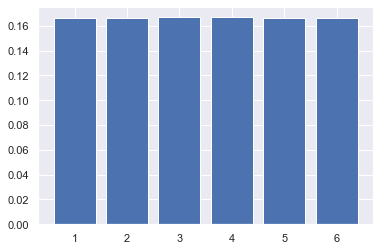

In [29]:
calc_steps = 1000
dice_rolls = np.random.choice(dice_data,calc_steps)
prob_data = np.array([])
for i in range(1,7):
    p = len(dice_rolls[dice_rolls == i])/calc_steps
    prob_data = np.append(prob_data,p)
plt.bar(dice_data,prob_data)
plt.grid(True)

0 がでる確率 0.625
1 がでる確率 0.375


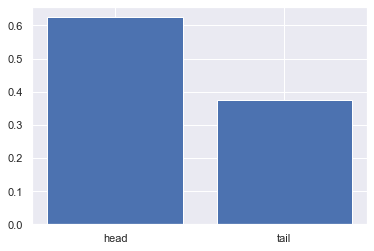

In [35]:
prob_be_data = np.array([])
coin_data = np.array([0,0,0,0,0,1,1,1])

for i in np.unique(coin_data):
    p = len (coin_data[coin_data == i])/len(coin_data)
    print(i,'がでる確率',p)
    prob_be_data = np.append(prob_be_data,p)
plt.bar(np.unique(coin_data),prob_be_data,align='center')
plt.xticks(np.unique(coin_data),['head','tail'])
plt.grid(True)

In [37]:
np.unique(coin_data)

array([0, 1])

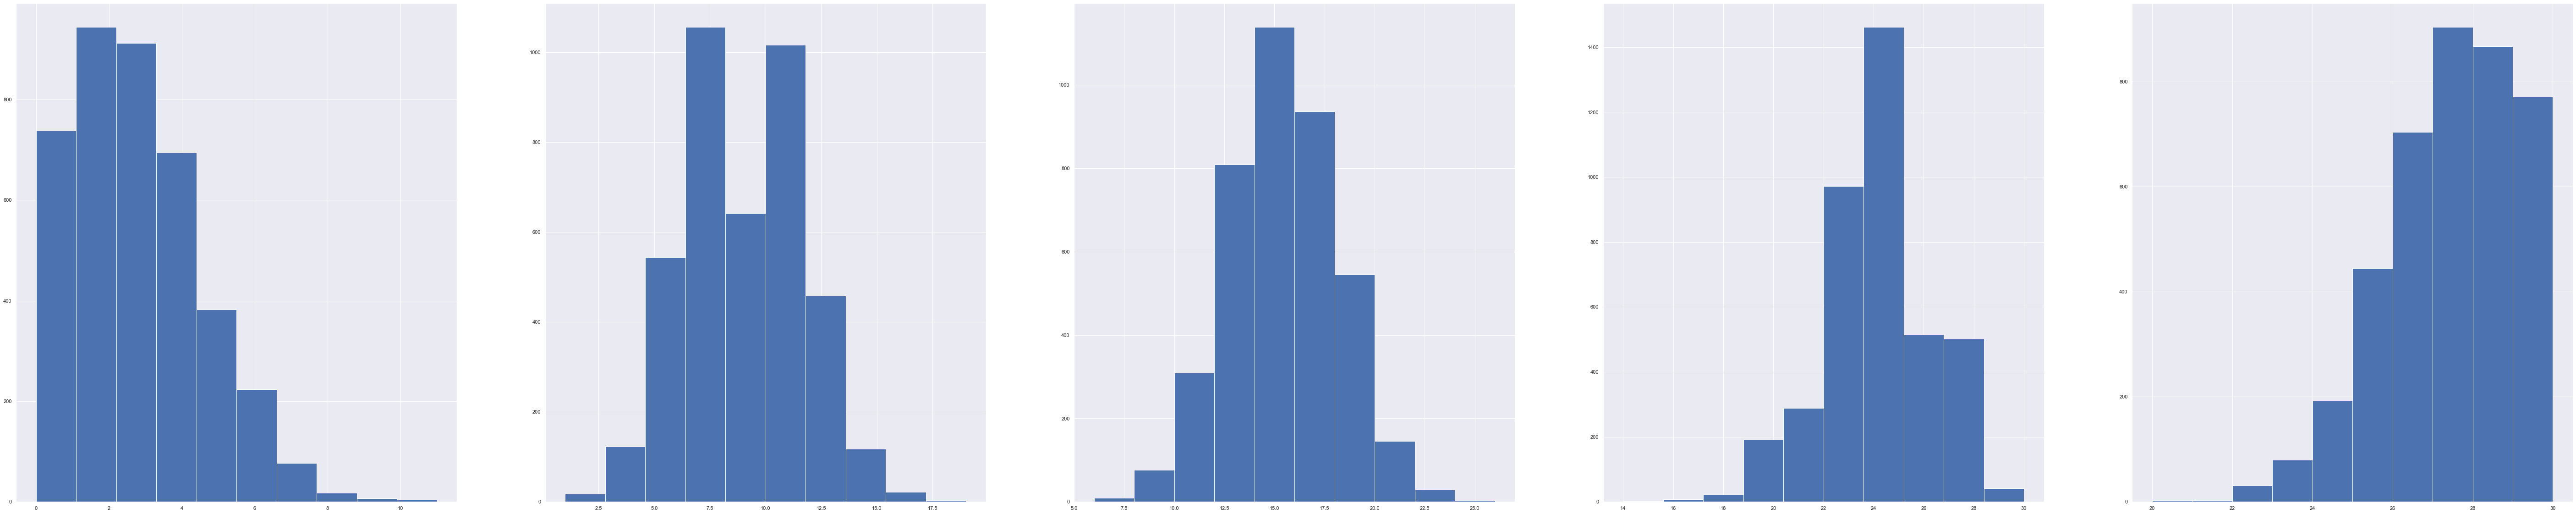

In [71]:
#二項分布(確率pで成功するベルヌーイ試行をstep回実施した場合の成功回数をrolls数回実施した場合）
np.random.seed(0)

plt.figure (figsize=(100,20))
coin_steps = 30
coin_prob  = 0.5
coin_rolls = 4000

plt.subplot(1,5,1)
x = np.random.binomial(coin_steps,0.1,coin_rolls)
plt.hist(x)
plt.grid(True)

plt.subplot(1,5,2)
x = np.random.binomial(coin_steps,0.3,coin_rolls)
plt.hist(x)
plt.grid(True)

plt.subplot(1,5,3)
x = np.random.binomial(coin_steps,coin_prob,coin_rolls)
plt.hist(x)
plt.grid(True)

plt.subplot(1,5,4)
x = np.random.binomial(coin_steps,0.8,coin_rolls)
plt.hist(x)
plt.grid(True)

plt.subplot(1,5,5)
x = np.random.binomial(coin_steps,0.9,coin_rolls)
plt.hist(x)
plt.grid(True)

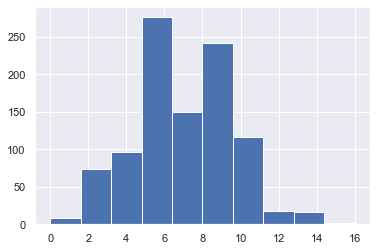

In [41]:
#ポアソン分布
x = np.random.poisson(7,1000)
plt.hist(x)
plt.grid(True)

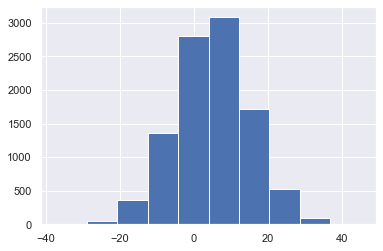

In [43]:
#正規分布（ガウス分布）
x = np.random.normal(5,10,10000)
plt.hist(x)
plt.grid(True)

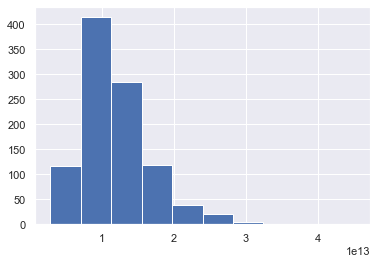

In [72]:
#対数正規分布
x = np.random.lognormal(30,0.4,1000)
plt.hist(x)
plt.grid(True)

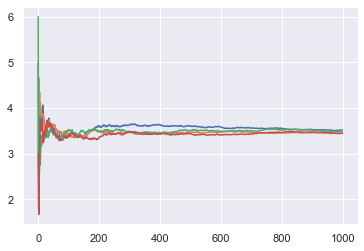

In [76]:
#対数の法則
calc_times = 1000
sample_array = np.array([1,2,3,4,5,6])
number_cnt = np.arange(1,calc_times +1)
for _ in range(4):
    p = np.random.choice(sample_array,calc_times).cumsum()
    plt.plot(p/number_cnt)
plt.grid(True)

In [92]:
#中心極限定理
def function_central_theory(N):
    sample_array = np.array([1,2,3,4,5,6])
    number_cnt = np.arange(1,N + 1) * 1.0
    mean_array = np.array([])
    
    for _ in range(1000):
#        cum_variables = np.random.choice(sample_array,N).cumsum() * 1.0
#        mean_array = np.append(mean_array,cum_variables[N-1]/N)
        cum_variables = np.random.choice(sample_array,N).sum() * 1.0
        mean_array = np.append(mean_array,cum_variables/N)
        
        
    plt.hist(mean_array)
    plt.grid(True)

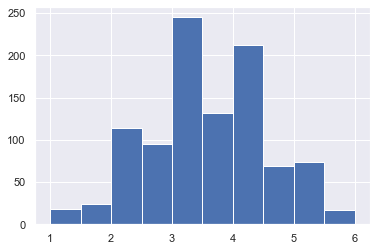

In [93]:
function_central_theory(3)

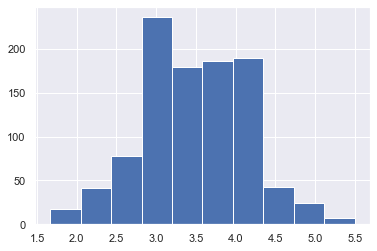

In [95]:
function_central_theory(6)

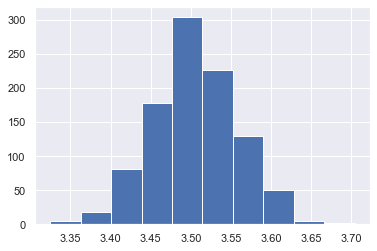

In [101]:
function_central_theory(10**3)

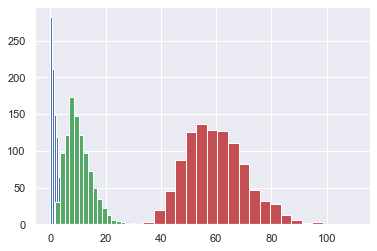

In [102]:
#カイ二乗分布
for df,c in zip([2,10,60],'bgr'):
    x = np.random.chisquare(df,1000)
    plt.hist(x,20,color=c)
    plt.grid(True)

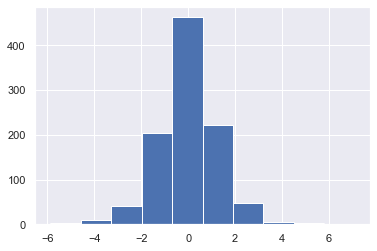

In [105]:
# t分布
x = np.random.standard_t(5,1000)
plt.hist(x)
plt.grid(True)

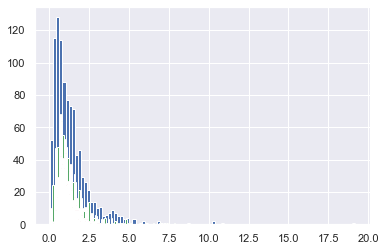

In [113]:
#f分布
for df,c in zip([(6,7),(10,10),(20,25)],'bgr'):
    x = np.random.f(df[0],df[1],1000)
    plt.hist(x,100,color=c)
    plt.grid(True)

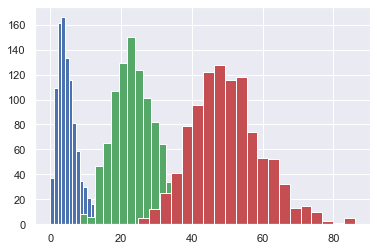

In [116]:
#練習問題4-7
for df,c in zip([5,25,50],'bgry'):
    x = np.random.chisquare(df,1000)
    plt.hist(x,20,color=c)
    plt.grid(True)

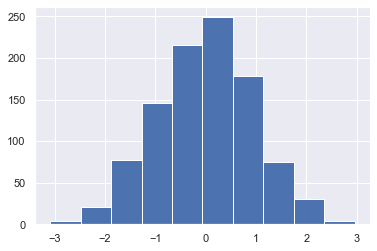

In [118]:
#練習問題4-8
x = np.random.standard_t(100,1000)
plt.hist(x)
plt.grid(True)

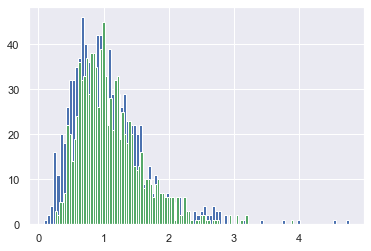

In [119]:
#練習問題4-9
for df,c in zip([(10,30),(20,25)],'bgr'):
    x = np.random.f(df[0],df[1],1000)
    plt.hist(x,100,color=c)
    plt.grid(True)